In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_test.shape

(10000, 28, 28)

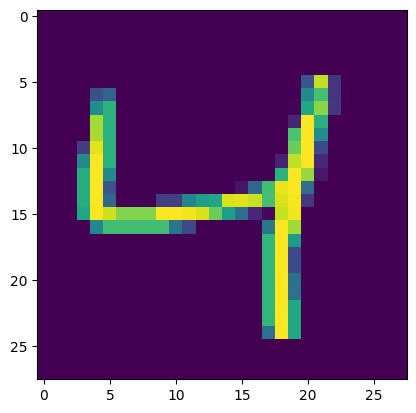

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2863 - accuracy: 0.9163 - val_loss: 0.1400 - val_accuracy: 0.9594
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1204 - accuracy: 0.9645 - val_loss: 0.1193 - val_accuracy: 0.9632
Epoch 3/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0846 - accuracy: 0.9740 - val_loss: 0.1052 - val_accuracy: 0.9694
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0662 - accuracy: 0.9784 - val_loss: 0.0974 - val_accuracy: 0.9710
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.1018 - val_accuracy: 0.9712
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0981 - val_accuracy: 0.9732
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.1097 - val_accuracy:

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736

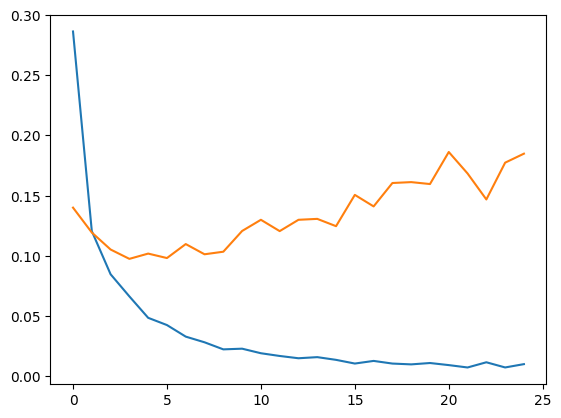

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

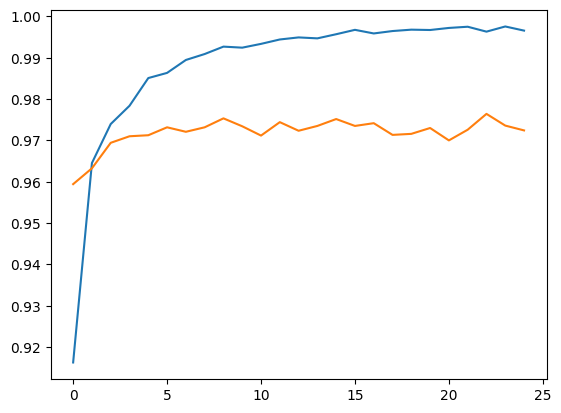

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

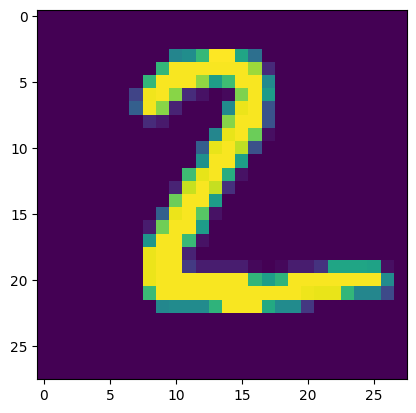

In [20]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([2])